In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For Stats
from scipy.stats import norm, skew
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
train= pd.read_csv('D:/Data Science Course 7-12/Project1/Train_UWu5bXk (2) (1) (1) (1).csv',index_col=False) #https://stackoverflow.com/questions/21902080/python-pandas-not-reading-first-column-from-csv-file
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test= pd.read_csv('D:/Data Science Course 7-12/Project1/Test_u94Q5KV (2) (1) (1) (1).csv',index_col=False)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.shape #shape function is similar to dim() in R

(8523, 12)

In [5]:
test.shape

(5681, 11)

In [374]:
train.info #info function is equivalent to str() in R

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [6]:
test.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1  

In [7]:
train.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
train.isnull().sum().to_frame('nulls') #https://stackoverflow.com/questions/41681693/pandas-isnull-sum-with-column-headers

,nulls
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


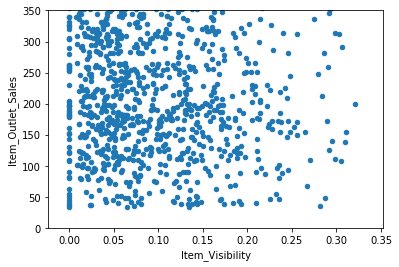

In [11]:
data= pd.concat([train['Item_Visibility'],train['Item_Outlet_Sales']],axis=1)
data.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales',ylim=(0,350))

In [12]:
!conda install -c conda-forge --yes plotnine #https://stackoverflow.com/questions/51916337/getting-modulenotfounderror-no-module-named-plotnine-when-import-on-jupyter-n


CondaValueError: invalid package specification: #https://stackoverflow.com/questions/51916337/getting-modulenotfounderror-no-module-named-plotnine-when-import-on-jupyter-n



In [13]:
from plotnine.data import mpg #https://stackoverflow.com/questions/51916337/getting-modulenotfounderror-no-module-named-plotnine-when-import-on-jupyter-n
import plotnine as p9


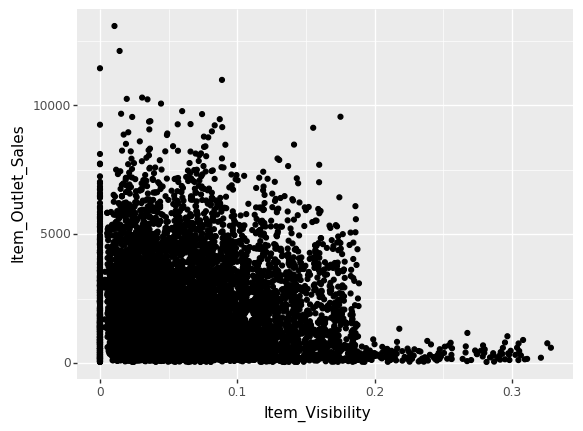

<ggplot: (-9223371908874108452)>

In [14]:
#to create
geompoints = p9.ggplot(data=train,
                         mapping=p9.aes(x='Item_Visibility', y='Item_Outlet_Sales')) #https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html
#to draw
geompoints + p9.geom_point() 

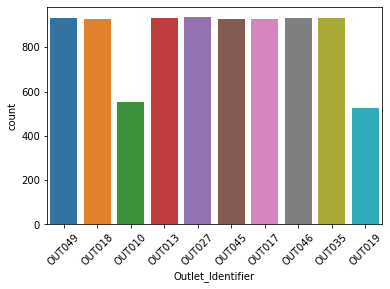

In [15]:
plt.figure()
sns.countplot(x='Outlet_Identifier', data=train) 
plt.xticks(rotation=45)
plt.show()

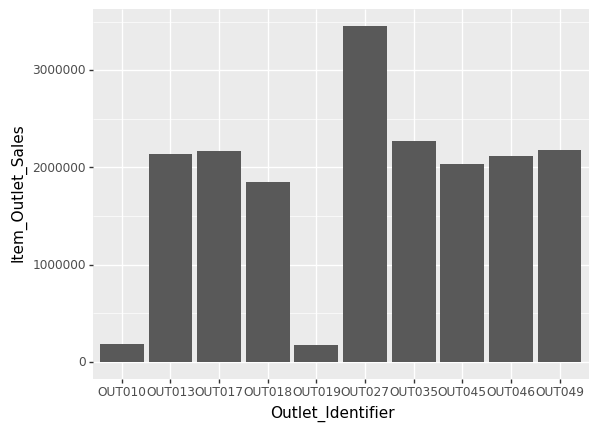

<ggplot: (-9223371908874031548)>

In [16]:
geombar = p9.ggplot(data=train,
                         mapping=p9.aes(x='Outlet_Identifier', y='Item_Outlet_Sales')) 

geombar + p9.geom_bar(stat="identity")

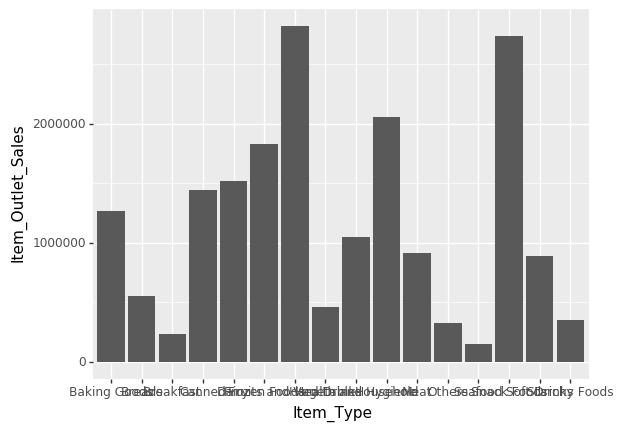

<ggplot: (-9223371908874015332)>

In [17]:
geombar = p9.ggplot(data=train,
                         mapping=p9.aes(x='Item_Type', y='Item_Outlet_Sales')) 

geombar + p9.geom_bar(stat="identity", size=20)

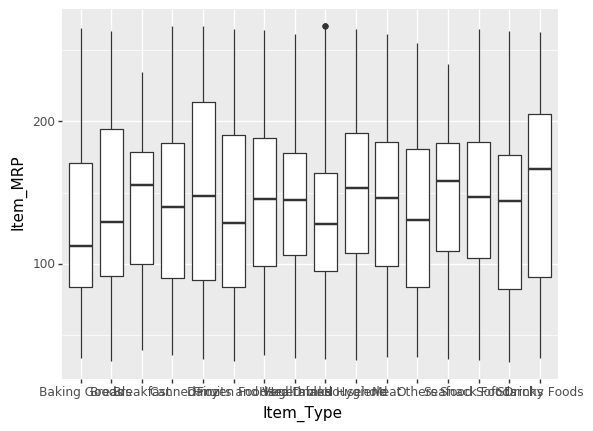

<ggplot: (-9223371908874011888)>

In [18]:
geomboxplot = p9.ggplot(data=train,
                         mapping=p9.aes(x='Item_Type', y='Item_MRP'))

geomboxplot + p9.geom_boxplot()

In [19]:
test.insert(10, "Item_Outlet_Sales", 1) #inserting column in test data to make the number of columns even in train and test before imputing
#https://www.w3resource.com/python-exercises/pandas/excel/python-pandas-excel-exercise-5.php?passed=passed

In [20]:
test.shape

(5681, 12)

In [21]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,1,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,1,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,1,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,1,Supermarket Type3


In [22]:
frames= [train, test] #combining both the data sets

In [23]:
combi = pd.concat(frames) #https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [24]:
combi.shape
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
#to impute missing values with median for Item Weight
weightfill = combi["Item_Weight"].median()
combi["Item_Weight"].fillna(weightfill, inplace=True)

In [26]:
combi.isnull().sum().to_frame('nulls')

,nulls
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [27]:
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
combi.Item_Visibility=combi.Item_Visibility.replace(0.000000,np.nan)# replacing 0 by nan 

In [29]:
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
#to impute missing values by mean for Item visibility
visiblefill = combi.Item_Visibility.mean()
combi.Item_Visibility.fillna(visiblefill, inplace=True)

In [31]:
combi.Item_Visibility

0       0.016047
1       0.019278
2       0.016760
3       0.070303
4       0.070303
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.070303
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [32]:
combi.isnull().sum().to_frame('nulls')

,nulls
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [33]:
combi.Item_Fat_Content.value_counts() #https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
combi['Item_Fat_Content'] = combi['Item_Fat_Content'].replace(["LF","low fat"],"Low Fat") #https://datatofish.com/replace-values-pandas-dataframe/

In [35]:
combi['Item_Fat_Content'] = combi['Item_Fat_Content'].replace(["reg","Regular"],"Regular Fat")

In [36]:
combi.Item_Fat_Content.value_counts()

Low Fat        9185
Regular Fat    5019
Name: Item_Fat_Content, dtype: int64

In [37]:
#imputing missing value with "others" for Outlet_Size
combi.Outlet_Size = combi.Outlet_Size.fillna('others')

In [38]:
print(combi['Outlet_Size'])

0       Medium
1       Medium
2       Medium
3       others
4         High
         ...  
5676     Small
5677    Medium
5678    others
5679    others
5680    others
Name: Outlet_Size, Length: 14204, dtype: object


In [39]:
combi.isnull().sum().to_frame('nulls')

,nulls
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [40]:
combi.Outlet_Identifier.value_counts().to_frame('count')


,count
OUT027,1559
OUT013,1553
OUT035,1550
OUT049,1550
OUT046,1550
OUT045,1548
OUT018,1546
OUT017,1543
OUT010,925
OUT019,880


In [41]:
combi.Item_Identifier.value_counts()

FDF52    10
FDE02    10
FDT32    10
FDQ08    10
DRJ47    10
         ..
FDR51     7
FDO33     7
FDS22     7
NCL42     7
FDM10     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [42]:
outlet_year= (2013-combi['Outlet_Establishment_Year'])
combi.groupby(outlet_year)["Outlet_Establishment_Year"].first()

Outlet_Establishment_Year
4     2009
6     2007
9     2004
11    2002
14    1999
15    1998
16    1997
26    1987
28    1985
Name: Outlet_Establishment_Year, dtype: int64

In [45]:
combi.Item_type_New = combi.Item_Identifier.apply(lambda x:x[0:2]) #https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/

combi.Item_type_New = combi.Item_type_New.map({'FD':'Food',
                                                         'DR':'Drinks',
                                                         'NC':'Non-consumables'}) #https://www.kite.com/python/answers/how-to-apply-a-function-to-a-list-in-python

In [46]:
combi.Item_type_New.value_counts()

Food               10201
Non-consumables     2686
Drinks              1317
Name: Item_Identifier, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [48]:
label_encoder =LabelEncoder()
combi.Item_Fat_Content =label_encoder.fit_transform(combi.Item_Fat_Content)#https://www.mygreatlearning.com/blog/label-encoding-in-python/#:~:text=In%20label%20encoding%20in%20Python,cases%20in%20India%20across%20states.
combi.Outlet_Size =label_encoder.fit_transform(combi.Outlet_Size)

In [49]:
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,3,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.070303,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052


In [50]:
combi.Outlet_Type =label_encoder.fit_transform(combi.Outlet_Type)

In [51]:
combi.Outlet_Location_Type =label_encoder.fit_transform(combi.Outlet_Location_Type)

In [52]:
#Predictive Modeling using Machine Learning

In [53]:
combi.drop(['Item_Fat_Content','Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True) #https://www.codespeedy.com/python-remove-a-column-from-a-csv-file-in-pandas/

In [54]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           14204 non-null  float64
 2   Item_Visibility       14204 non-null  float64
 3   Item_MRP              14204 non-null  float64
 4   Outlet_Identifier     14204 non-null  object 
 5   Outlet_Size           14204 non-null  int32  
 6   Outlet_Location_Type  14204 non-null  int32  
 7   Outlet_Type           14204 non-null  int32  
 8   Item_Outlet_Sales     14204 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 943.2+ KB


In [55]:
new_test = combi.loc[combi['Item_Outlet_Sales']==1] #https://github.com/shrikant-temburwar/Big-Mart-Sales-Prediction/blob/master/BigMartSales.ipynb
new_train = combi.loc[-(combi['Item_Outlet_Sales']==1)]

In [56]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Visibility       8523 non-null   float64
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Identifier     8523 non-null   object 
 5   Outlet_Size           8523 non-null   int32  
 6   Outlet_Location_Type  8523 non-null   int32  
 7   Outlet_Type           8523 non-null   int32  
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int32(3), object(2)
memory usage: 566.0+ KB


In [57]:
new_test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,0.007565,107.8622,OUT049,1,0,1,1.0
1,FDW14,8.300,0.038428,87.3198,OUT017,3,1,1,1.0
2,NCN55,14.600,0.099575,241.7538,OUT010,3,2,0,1.0
3,FDQ58,7.315,0.015388,155.0340,OUT017,3,1,1,1.0
4,FDY38,12.600,0.118599,234.2300,OUT027,1,2,3,1.0
...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,0.013496,141.3154,OUT046,2,0,1,1.0
5677,FDD47,7.600,0.142991,169.1448,OUT018,1,2,2,1.0
5678,NCO17,10.000,0.073529,118.7440,OUT045,3,1,1,1.0
5679,FDJ26,15.300,0.070303,214.6218,OUT017,3,1,1,1.0


In [58]:
new_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0.016047,249.8092,OUT049,1,0,1,3735.1380
1,DRC01,5.920,0.019278,48.2692,OUT018,1,2,2,443.4228
2,FDN15,17.500,0.016760,141.6180,OUT049,1,0,1,2097.2700
3,FDX07,19.200,0.070303,182.0950,OUT010,3,2,0,732.3800
4,NCD19,8.930,0.070303,53.8614,OUT013,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,0,2,1,2778.3834
8519,FDS36,8.380,0.046982,108.1570,OUT045,3,1,1,549.2850
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2,1,1,1193.1136
8521,FDN46,7.210,0.145221,103.1332,OUT018,1,2,2,1845.5976


In [59]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       5681 non-null   object 
 1   Item_Weight           5681 non-null   float64
 2   Item_Visibility       5681 non-null   float64
 3   Item_MRP              5681 non-null   float64
 4   Outlet_Identifier     5681 non-null   object 
 5   Outlet_Size           5681 non-null   int32  
 6   Outlet_Location_Type  5681 non-null   int32  
 7   Outlet_Type           5681 non-null   int32  
 8   Item_Outlet_Sales     5681 non-null   float64
dtypes: float64(4), int32(3), object(2)
memory usage: 377.3+ KB


In [60]:
from sklearn.model_selection import cross_validate

In [61]:
new_test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [62]:
X = new_train.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis=1)
y = new_train.Item_Outlet_Sales

In [63]:
X_test = new_test.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lin = LinearRegression()

In [66]:
lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred = lin.predict(X_test)

In [68]:
y_pred

array([1887.74805066, 1224.15212287, 2294.65427058, ..., 1647.1744798 ,
       3143.98210854,  982.65370169])

In [69]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [70]:
lr_accuracy = round(lin.score(X,y) * 100,2) 
lr_accuracy

49.96

In [71]:
r2_score(y, lin.predict(X))

0.4996001980994902

In [72]:
#Perform cross-validation:
cv_score = cross_val_score(lin, X, y, cv=5, scoring='neg_mean_squared_error') #https://github.com/shrikant-temburwar/Big-Mart-Sales-Prediction/blob/master/BigMartSales.ipynb

In [73]:
print(np.sqrt(np.abs(cv_score))) #https://github.com/shrikant-temburwar/Big-Mart-Sales-Prediction/blob/master/BigMartSales.ipynb

[1226.51754489 1181.11252294 1191.58676385 1212.74747596 1228.44969677]


In [74]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y, lin.predict(X)))) #https://github.com/shrikant-temburwar/Big-Mart-Sales-Prediction/blob/master/BigMartSales.ipynb

RMSE : 1207


In [75]:
submission = pd.DataFrame({
'Item_Identifier':new_test['Item_Identifier'],
'Outlet_Identifier':new_test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']) #https://github.com/shrikant-temburwar/Big-Mart-Sales-Prediction/blob/master/BigMartSales.ipynb

In [76]:
submission.to_csv('submission1.csv',index=False)

In [77]:
#Decision Tree Model:    

In [78]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=300, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3572.23183663, 1349.51290433])

In [80]:
tree_accuracy = round(regressor.score(X,y),2)
tree_accuracy

0.59

In [81]:
r2_score(y, regressor.predict(X))

0.5883822386190469

In [82]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1138.14985981 1111.52060861 1137.72183159 1112.23540036 1128.28263291]


In [83]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y, regressor.predict(X))))

RMSE : 1095


In [84]:
submission = pd.DataFrame({
'Item_Identifier':new_test['Item_Identifier'],
'Outlet_Identifier':new_test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [85]:
submission.to_csv('submission2.csv',index=False)

In [86]:
##Random Forest Model

In [87]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [88]:
y_pred = regressor.predict(X_test)
y_pred

array([1642.43947979, 1362.4849528 ,  599.60786214, ..., 1969.3360636 ,
       3674.74814298, 1310.97571124])

In [89]:
rf_accuracy = round(regressor.score(X,y),2)
rf_accuracy

0.61

In [90]:
r2_score(y, regressor.predict(X))

0.612383832815196

In [91]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1100.66089682 1077.43430771 1075.79014679 1068.96082549 1084.31440121]


In [92]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y, regressor.predict(X))))

RMSE : 1062


In [93]:
submission = pd.DataFrame({
'Item_Identifier':new_test['Item_Identifier'],
'Outlet_Identifier':new_test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [94]:
submission.to_csv('submission3.csv',index=False)